<a href="https://colab.research.google.com/github/Roheemah001/OOU_DTS201_Introduction_to_Data_Science/blob/main/notebooks/DTS201_Week4_PH_Student_Centred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DTS 201 – INTRODUCTION TO DATA SCIENCE  
## WEEK 4 PRACTICAL (PH): DISTRIBUTIONS, PROBABILITY AND SIMULATION

**Instructor:** DR SAKINAT FOLORRUNSO – ASSOCIATE PROFESSOR OF AI SYSTEMS AND FAIR DATA  
**Department:** COMPUTER SCIENCES, OLABISI ONABANJO UNIVERSITY, AGO-IWOYE, OGUN STATE, NIGERIA  

---

### 🎯 Practical Learning Objectives (Week 4)

By the end of this practical session, you should be able to:

- Simulate **coin tosses** and **dice rolls** using a computer.  
- Estimate empirical probabilities from simulation results.  
- Compare simulated frequencies with theoretical probabilities.  
- Generate and visualize **normal**, **binomial**, and **uniform** distributions.  
- Interpret basic properties of distributions (center, spread, and shape).  

> 💡 This notebook uses **Python (NumPy + Matplotlib/Seaborn)** instead of R, but the underlying ideas are the same as in the course outline.


## 1. Getting Started: Why Simulate?

In real life, it may be difficult or time‑consuming to toss a coin 10,000 times or roll a die 5,000 times.  
With a computer, we can simulate such experiments **very quickly** and use the results to:

- Understand probability concepts.  
- Visualize distributions.  
- Build intuition for randomness and variation.  

In this practical, you will simulate:

- Coin tosses (Heads/Tails)  
- Dice rolls (1–6)  
- Random values from normal, binomial, and uniform distributions  


## 2. Importing Required Libraries

In [2]:
# Import numpy for numerical computing and random simulations
import numpy as np

# Import pandas (optional) for tabular display of results
import pandas as pd

# Import matplotlib for basic plotting
import matplotlib.pyplot as plt

# Import seaborn for nicer statistical visualizations
import seaborn as sns

# Ensure plots appear inside the notebook
%matplotlib inline

# Set a clean visual style for plots
plt.style.use("seaborn-v0_8")

## 3. Simulating a Fair Coin Toss

We start with a **fair coin**, where:

- Probability of **Heads (H)** = 0.5  
- Probability of **Tails (T)** = 0.5  

We will simulate many tosses and see how often we get Heads vs Tails.


In [5]:
# Set a random seed so that results are reproducible (optional)
np.random.seed(42)  # Using a fixed seed helps get the same results each time the notebook is run

# Decide how many coin tosses to simulate
n_tosses = 5000  # You can change this to 100, 10000, etc.

# Simulate n_tosses outcomes of a fair coin
# np.random.choice selects randomly from the list ['H', 'T'] with equal probability by default
coin_outcomes = np.random.choice(['H', 'T'], size=n_tosses, p=[0.5, 0.5])

# Convert the simulated outcomes into a pandas Series for easier analysis
coin_series = pd.Series(coin_outcomes)

# Compute the frequency (count) of each outcome (H and T)
coin_counts = coin_series.value_counts()

# Compute the relative frequency (proportion) of each outcome
coin_relative_freq = coin_series.value_counts(normalize=True)

# Display the counts and relative frequencies
print(" Coin toss counts:", coin_counts)
print(" Coin toss relative frequencies:", coin_relative_freq)

 Coin toss counts: H    2500
T    2500
Name: count, dtype: int64
 Coin toss relative frequencies: H    0.5
T    0.5
Name: proportion, dtype: float64


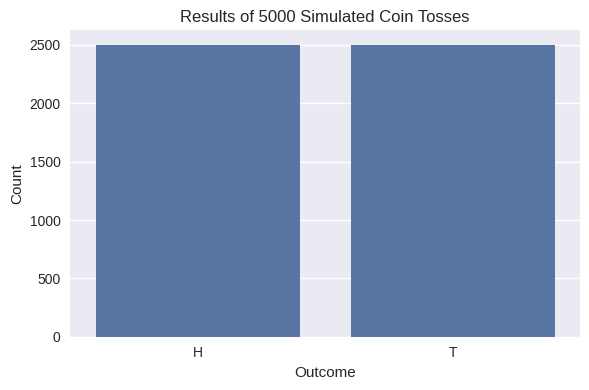

In [6]:
# Plot the frequency of Heads and Tails as a bar chart
plt.figure(figsize=(6, 4))  # Set the size of the figure

# Use seaborn barplot to plot the counts of each category
sns.barplot(x=coin_counts.index, y=coin_counts.values)  # x: categories (H/T), y: counts

# Add title and labels
plt.title(f"Results of 5000 Simulated Coin Tosses")  # Plot title
plt.xlabel("Outcome")  # Label for x-axis
plt.ylabel("Count")    # Label for y-axis

# Show the plot
plt.tight_layout()  # Adjust layout to avoid cutting off labels
plt.show()

> ✏️ **Student Task 1:**  
> - Change `n_tosses` to 50, then 5000, and rerun the simulation.  
> - Compare the relative frequencies with the theoretical probabilities (0.5 for H and 0.5 for T).  
> - Do the relative frequencies get closer to 0.5 as `n_tosses` increases? Explain briefly.


Yes it gets closer. when i tried it with 50 tosses the head was at 0.56 while the tail was at 0.44 on increasing it to 5000, both the head and tail were at 0.5.

### 3.1 Simulating a Biased Coin (Optional Extension)

In [7]:
# Example of a biased coin where the probability of Heads is 0.7 and Tails is 0.3
n_tosses_biased = 1000  # Number of tosses for the biased coin

# Simulate outcomes using custom probabilities for H and T
biased_outcomes = np.random.choice(['H', 'T'], size=n_tosses_biased, p=[0.7, 0.3])

# Convert to Series for analysis
biased_series = pd.Series(biased_outcomes)

# Compute relative frequencies
biased_relative_freq = biased_series.value_counts(normalize=True)

# Display relative frequencies for the biased coin
print("Biased coin relative frequencies: ", biased_relative_freq)

Biased coin relative frequencies:  H    0.708
T    0.292
Name: proportion, dtype: float64


## 4. Simulating a Fair Six-Sided Die

A standard die has six faces, numbered 1 to 6, and for a **fair die**:

- P(1) = P(2) = P(3) = P(4) = P(5) = P(6) = 1/6.


In [9]:
# Decide how many dice rolls to simulate
n_rolls = 2000  # You can experiment with different values

# Simulate n_rolls outcomes from 1 to 6 (inclusive)
# np.random.randint(low, high+1, size) generates random integers between low and high
dice_outcomes = np.random.randint(1, 7, size=n_rolls)

# Convert to pandas Series
dice_series = pd.Series(dice_outcomes)

# Compute counts and relative frequencies
dice_counts = dice_series.value_counts().sort_index()  # Sort by face value (1 to 6)
dice_relative_freq = dice_series.value_counts(normalize=True).sort_index()

# Display frequencies
print(" Dice roll counts:", dice_counts)
print(" Dice roll relative frequencies:", dice_relative_freq)

 Dice roll counts: 1    342
2    323
3    352
4    322
5    376
6    285
Name: count, dtype: int64
 Dice roll relative frequencies: 1    0.1710
2    0.1615
3    0.1760
4    0.1610
5    0.1880
6    0.1425
Name: proportion, dtype: float64


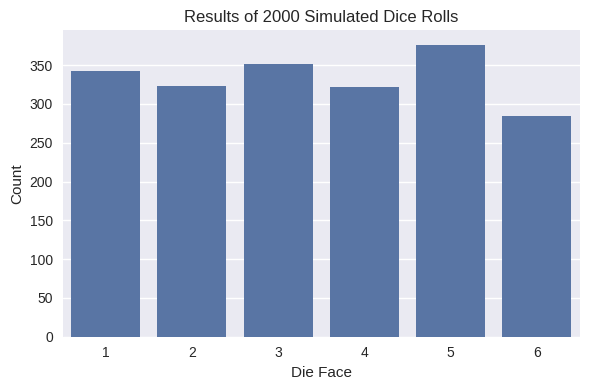

In [10]:
# Plot the distribution of dice outcomes
plt.figure(figsize=(6, 4))  # Figure size

# Create a bar plot of counts for each face of the die
sns.barplot(x=dice_counts.index, y=dice_counts.values)

# Add title and labels
plt.title(f"Results of {n_rolls} Simulated Dice Rolls")
plt.xlabel("Die Face")
plt.ylabel("Count")

# Show the plot
plt.tight_layout()
plt.show()

> ✏️ **Student Task 2:**  
> - Compare the relative frequencies with the theoretical probability (≈ 0.1667 for each face).  
> - Are some faces slightly more frequent than others in your simulation? Is that expected? Why or why not?


Yes, 2 and 4 are more frequent than the others. Yes it is expected, this is because its a random process with

## 5. Law of Large Numbers (Informal Demonstration)

In [ ]:
# We will see how the relative frequency of rolling a '6' approaches 1/6 as the number of rolls increases

# Define a range of different sample sizes (number of rolls)
sample_sizes = [10, 50, 100, 500, 1000, 5000]

# Create an empty list to store the estimated probabilities
estimated_probs = []

# Loop through each sample size
for n in sample_sizes:
    # Simulate n dice rolls
    rolls = np.random.randint(1, 7, size=n)
    # Compute the proportion of rolls that resulted in 6
    prob_six = np.mean(rolls == 6)
    # Append the result to the list
    estimated_probs.append(prob_six)

# Plot how the estimated probability of rolling a 6 changes with more rolls
plt.figure(figsize=(7, 4))

# Plot sample size on x-axis and estimated probability on y-axis
plt.plot(sample_sizes, estimated_probs, marker='o', linestyle='-')

# Draw a horizontal line at the theoretical probability 1/6
plt.axhline(y=1/6, color='red', linestyle='--', label='Theoretical P(6) = 1/6')

# Add title and labels
plt.title("Estimated Probability of Rolling a 6 vs Number of Rolls")
plt.xlabel("Number of Rolls")
plt.ylabel("Estimated Probability of Rolling a 6")

# Show legend to explain the red line
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

> ✏️ **Student Reflection 3:**  
> - As the number of rolls increases, what happens to the estimated probability of rolling a 6?  
> - How does this support the **Law of Large Numbers**?


## 6. Visualizing Probability Distributions

We now simulate and visualize three important distributions:

1. **Normal distribution** – continuous, bell-shaped, often used for heights, exam scores, etc.  
2. **Binomial distribution** – discrete, number of successes in repeated yes/no trials.  
3. **Uniform distribution** – continuous, all values within an interval are equally likely.


### 6.1 Normal Distribution

In [ ]:
# Set parameters for the normal distribution
mean = 0      # Center of the distribution
std_dev = 1   # Standard deviation (controls spread)

# Decide how many random values to generate
n_samples_normal = 5000

# Generate random samples from a normal distribution
normal_samples = np.random.normal(loc=mean, scale=std_dev, size=n_samples_normal)

# Plot a histogram of the samples
plt.figure(figsize=(7, 4))

# Use histplot with many bins and density=True to approximate the probability density
sns.histplot(normal_samples, bins=40, kde=True, stat="density")

# Add title and axis labels
plt.title("Normal Distribution Simulation (mean = 0, std = 1)")
plt.xlabel("Value")
plt.ylabel("Density")

# Display the plot
plt.tight_layout()
plt.show()

> ✏️ **Student Task 4:**  
> - Change `mean` to 10 and `std_dev` to 2, rerun the cell, and observe how the shape and position of the curve change.  
> - How does increasing the standard deviation affect the spread of the distribution?


### 6.2 Binomial Distribution

Binomial distribution example:  
> Number of **Heads** obtained when a fair coin is tossed 10 times.

Here,  
- `n` = number of trials (e.g., 10 tosses),  
- `p` = probability of success on each trial (e.g., 0.5 for Heads).

In [ ]:
# Set parameters for the binomial distribution
n_trials = 10   # Number of coin tosses in each experiment
p_success = 0.5 # Probability of getting Heads

# Decide how many experiments to simulate
n_experiments = 5000

# Generate random samples: each sample is the number of Heads in n_trials tosses
binomial_samples = np.random.binomial(n=n_trials, p=p_success, size=n_experiments)

# Plot a histogram of the binomial outcomes
plt.figure(figsize=(7, 4))

# histplot with discrete bins (since binomial is discrete)
sns.histplot(binomial_samples, bins=range(0, n_trials+2), discrete=True)

# Add title and labels
plt.title(f"Binomial Distribution Simulation (n = {n_trials}, p = {p_success})")
plt.xlabel("Number of Successes (e.g., Heads)")
plt.ylabel("Frequency")

# Display the plot
plt.tight_layout()
plt.show()

> ✏️ **Student Task 5:**  
> - Change `p_success` to 0.2 and then to 0.8 and rerun the cell.  
> - How does the shape of the distribution change as the probability of success increases or decreases?


### 6.3 Uniform Distribution

Uniform distribution example:  
> A random real number chosen between 0 and 1, where all values in the interval are equally likely.


In [ ]:
# Set the interval for the uniform distribution
low = 0.0   # Lower bound of the interval
high = 1.0  # Upper bound of the interval

# Decide how many random values to generate
n_samples_uniform = 5000

# Generate random samples from a uniform distribution
uniform_samples = np.random.uniform(low=low, high=high, size=n_samples_uniform)

# Plot a histogram of the uniform samples
plt.figure(figsize=(7, 4))

sns.histplot(uniform_samples, bins=40, stat="density")

# Add title and labels
plt.title(f"Uniform Distribution Simulation (low = {low}, high = {high})")
plt.xlabel("Value")
plt.ylabel("Density")

# Display the plot
plt.tight_layout()
plt.show()

> ✏️ **Student Task 6:**  
> - Change `low` to -3 and `high` to 5 and rerun the cell.  
> - Compare the shape of the histogram with the normal distribution. What is the main difference?


## 7. Mini Simulation Exercise

> 🧪 **Student Activity:**  
> Design a small simulation experiment of your own. Examples:

- Model the number of customers arriving per hour (you may approximate with a suitable distribution).  
- Simulate the total score when rolling two dice and adding the results.  
- Simulate marks for an exam using a normal distribution with a chosen mean and standard deviation.

For your experiment:

1. Explain the **real-world scenario** you are modelling.  
2. Justify which distribution you chose (normal/binomial/uniform or combination).  
3. Generate simulated data and visualize it with at least **two plots**.  
4. Write a short paragraph interpreting your results.


## 8. Summary and Reflection (Week 4 PH)

In this Week 4 practical, you have:

- Simulated coin tosses and dice rolls to approximate theoretical probabilities.  
- Observed how increasing the number of trials makes empirical frequencies approach theoretical values.  
- Generated and visualized **normal**, **binomial**, and **uniform** distributions.  
- Built intuition about the **shape**, **center**, and **spread** of common probability distributions.

> 🧠 **Final Reflection (write 1–2 paragraphs):**  
> - Which simulation or distribution did you find easiest to understand? Which was most challenging?  
> - How can simulation help you understand probability concepts better than formulas alone?  
> - How might these ideas be useful later for data science modelling and hypothesis testing?
